In [253]:
%pip install numpy pandas
import numpy as np
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [254]:
import pandas as pd
import os

df = None
file_name = "spambase.data"
path = "./datasets/spambase/" + file_name

# Check if directory exists, if not create it
os.makedirs("./datasets/spambase", exist_ok=True)

try:
    df = pd.read_csv(path, header=None)
    print(f"Loaded data from {path}")
except FileNotFoundError:
    try:
        url = (
                "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/"
                + file_name
        )
        df = pd.read_csv(url, header=None)
        df.to_csv(path, index=False, header=False)
        print(f"Downloaded and saved data from {url}")
    except Exception as e:
        print(f"Failed to download the file: {e}")
        raise

# Check if the dataframe is empty
if df.empty:
    raise Exception("Dataframe is empty")

# Print head and describe
print(df.head())
print(df.describe())

Loaded data from ./datasets/spambase/spambase.data
     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]
                0            1            2            3            4   \
count  4601.000000  4601.000000  4601.000000  4

In [255]:
# Data exploration
is_na = df.isna().any().any()
print('Is there any NA? ', is_na)
# Il n'y a pas de valeurs manquantes

Is there any NA?  False


In [256]:
# Features and labels
x = df.drop(df.columns[-1], axis=1).values
y = df[df.columns[-1]].values

In [257]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [258]:
# Normalize the data to remove (in)significant features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [259]:
# Predictions on test data
y_pred = model.predict(x_test)
print(y_pred)

[1 0 0 ... 0 1 0]


In [260]:
# Prediction on custom data
from api import extract_2d

features = extract_2d("Tu as gagné 1 million , envoie ton RIB pour recevoir ton gain!!!")
y_pred = model.predict(features)
print(y_pred)

test_features = extract_2d("You have won 1 MILLION $, please send you ADDRESS !!!")
y_pred = model.predict(test_features)
print(y_pred)

test_features = extract_2d(
    "You won a trip to LAS VEGAS, please send your rib to receive your gain!!!"
)
y_pred = model.predict(test_features)
print(y_pred)

test_features = extract_2d(
    "Has ganado 1 MILLÓN de dinero, por favor envíate la DIRECCIÓN !!!"
)
y_pred = model.predict(test_features)
print(y_pred)

[1]
[1]
[1]
[1]


In [261]:
# Save model
# import joblib
# joblib.dump(model, 'model.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# print('Model saved as model.pkl')
# print('Scaler saved as scaler.pkl')

# Load model
# model = joblib.load("model.pkl")
# scaler = joblib.load("scaler.pkl")
# print("Model loaded from model.pkl")
# print("Scaler loaded from scaler.pkl")

# Predict if the model is still working
# y_pred = model.predict(x_test)
# print("Accuracy: ", model.score(x_test, y_test))

In [262]:
import tarfile
import os

# Create directories for spam and ham datasets
os.makedirs("./datasets/spam", exist_ok=True)
os.makedirs("./datasets/ham", exist_ok=True)

# URLs for the datasets
datasets = {
    "spam": ["20021010_spam.tar.bz2", "20030228_spam.tar.bz2"],
    "ham": [
        "20021010_easy_ham.tar.bz2",
        "20021010_hard_ham.tar.bz2",
        "20030228_easy_ham.tar.bz2",
    ],
}


# Function to download and extract datasets
def download_and_extract(file_name, dataset_type):
    url = "https://spamassassin.apache.org/old/publiccorpus/" + file_name
    os.system(f"wget {url} -P ./datasets/{dataset_type}")
    tar = tarfile.open(f"./datasets/{dataset_type}/{file_name}")
    tar.extractall(f"./datasets/{dataset_type}")
    tar.close()


# Download and extract spam datasets
for file in datasets["spam"]:
    try:
        # Check if the file is already downloaded
        if not os.path.exists(f"./datasets/spam/{file}"):
            download_and_extract(file, "spam")
    except FileNotFoundError:
        print(f"File {file} not found")

# Download and extract ham datasets
for file in datasets["ham"]:
    try:
        if not os.path.exists(f"./datasets/ham/{file}"):
            download_and_extract(file, "ham")
    except FileNotFoundError:
        print(f"File {file} not found")

In [263]:
# All the data is spam

import numpy as np
import re
import os
from api import extract_1d, prioritize_features
from sklearn.model_selection import train_test_split


def is_html_content(email_body):
    """
    Check if the email body contains a significant amount of HTML content.
    This function filters out emails with minimal HTML.
    """
    if (
            re.search(r"<[^>]+>", email_body) and email_body.count("<") > 20
    ):  # Adjust threshold if needed
        return True
    return False


def extract_email_body(email):
    """
    Extract the main content of an email by removing headers.
    If no clear separation is found, return the entire email content.
    """
    parts = email.split("\n\n", 1)
    if len(parts) == 2:
        _, body = parts
    else:
        body = email  # Return the entire content if no clear separation is found
    body = body.strip()
    return body


def load_emails(paths):
    emails = []
    for path in paths:
        for file in os.listdir(path):
            file_path = os.path.join(path, file)
            if os.path.isfile(file_path):
                with open(file_path, "r", errors="ignore") as f:
                    email_content = f.read()
                    if not is_html_content(email_content):
                        emails.append(extract_email_body(email_content))
    return emails


# Path to spam and ham datasets
spam_path = ["./datasets/spam/spam"]
ham_paths = ["./datasets/ham/easy_ham", "./datasets/ham/hard_ham"]
# Load spam emails
spam_emails = load_emails(spam_path)
ham_emails = load_emails(ham_paths)

print(f"Number of spam emails: {len(spam_emails)}")
print(f"Number of ham emails: {len(ham_emails)}")

spam_features = np.array([extract_1d(email) for email in spam_emails])
ham_features = np.array([extract_1d(email) for email in ham_emails])

# On priorise les features les plus importantes
spam_features = prioritize_features(spam_features)

print(f"Spam features: {spam_features.shape}")
print(f"Ham features: {ham_features.shape}")

# Labels: 1 for spam, 0 for ham
spam_labels = np.ones(len(spam_features))
ham_labels = np.zeros(len(ham_features))

# Combine spam and ham features and labels using np.concatenate
all_features = np.concatenate((spam_features, ham_features), axis=0)
all_labels = np.concatenate((spam_labels, ham_labels), axis=0)

# Display features and labels for verification
print("Sample of Spam Features:")
print(spam_features[:3])
print("Sample of Ham Features:")
print(ham_features[:3])
print("Labels:")
print(all_labels[:20])

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    all_features, all_labels, test_size=0.2, random_state=0
)



Number of spam emails: 531
Number of ham emails: 4637
Spam features: (531, 57)
Ham features: (4637, 57)
Sample of Spam Features:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.85894877e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.91949434e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65735196e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.99201597e-01
  0.00000000e+00 2.66134398e-01 5.52228876e+00 0.00000000e+00
  6.65335995e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0

In [264]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print("Confusion Matrix:")
print(cm)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

spam_mean_features = np.mean(spam_features, axis=0)
ham_mean_features = np.mean(ham_features, axis=0)

print("Mean Features for Spam Emails:")
print(spam_mean_features)
print("Mean Features for Ham Emails:")
print(ham_mean_features)

Confusion Matrix:
[[917   2]
 [  0 115]]
Accuracy: 99.81%
Precision: 98.29%
Recall: 100.00%
F1 Score: 99.14%
Mean Features for Spam Emails:
[1.98794581e-01 1.64276363e-01 7.00065163e-01 1.00789176e+00
 2.16408724e+00 2.38342736e-01 3.15152659e-01 5.68000659e-02
 8.31587673e-02 1.14204779e+00 1.54296265e-01 4.36922314e-01
 1.28158967e-01 3.83234313e-02 3.43621811e-02 2.00602047e-01
 6.91127263e-02 4.20154186e-01 2.78566286e+00 4.38403700e-02
 1.17764404e+00 1.43335887e-02 7.17704867e-01 1.53444149e-01
 4.20793741e-01 1.55703941e-04 0.00000000e+00 3.36845388e-03
 1.08389105e-01 0.00000000e+00 0.00000000e+00 1.66079169e-03
 3.33977196e-02 5.59316488e-03 4.13444658e-01 8.13720476e-03
 3.50850834e-03 3.56243365e-03 1.15549166e-01 4.50779667e-02
 7.47426325e-02 1.64249126e-03 3.27531488e-02 3.84842470e-02
 5.87478918e+00 1.46275575e-02 4.31597210e-02 0.00000000e+00
 3.36093398e-02 1.61220417e-01 2.97719088e-02 4.80417533e-01
 2.66346005e-01 1.72042065e-01 3.51787076e+00 1.57740113e+01
 2.244

In [265]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
from api import extract_2d

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# New sample inputs for prediction
emails_to_test = [
    "You have won a free trip to Paris! Reply to this email to claim your prize GO CHECK YOUR EMAIL NOW",
    "Coucou maman",
    "You have won 1 million dollars $$$$ Please send your bank details to claim your prize!!!",
    "Your account has been suspended. Please verify your identity to restore access.",
    "Salut je vais te hacker ramnène moi 500 EUROS dans les 24 heures!!!!!!",
    "Meeting tomorrow at 10 AM. Please confirm your attendance.",
]

y_tests = [1, 0, 1, 1, 1, 0]
y_preds = []

# Predict and display results
for email in emails_to_test:
    features = extract_2d(email)
    y_pred = model.predict(features)
    y_preds.append(y_pred)
    if y_pred == 1:
        print(f"'{email}' is classified as SPAM.")
    else:
        print(f"'{email}' is classified as NOT SPAM.")

# Confusion matrix
cm = confusion_matrix(y_tests, y_preds, labels=[0,1])
print("Confusion Matrix:")
print(cm)

# Evaluate the model
accuracy = accuracy_score(y_tests, y_preds)
precision = precision_score(y_tests, y_preds, pos_label=1)
recall = recall_score(y_tests, y_preds, pos_label=1)
f1 = f1_score(y_tests, y_preds, pos_label=1)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

'You have won a free trip to Paris! Reply to this email to claim your prize GO CHECK YOUR EMAIL NOW' is classified as SPAM.
'Coucou maman' is classified as NOT SPAM.
'You have won 1 million dollars $$$$ Please send your bank details to claim your prize!!!' is classified as NOT SPAM.
'Your account has been suspended. Please verify your identity to restore access.' is classified as NOT SPAM.
'Salut je vais te hacker ramnène moi 500 EUROS dans les 24 heures!!!!!!' is classified as SPAM.
'Meeting tomorrow at 10 AM. Please confirm your attendance.' is classified as NOT SPAM.
Confusion Matrix:
[[2 0]
 [2 2]]
Accuracy: 66.67%
Precision: 100.00%
Recall: 50.00%
F1 Score: 66.67%


In [266]:
# Export the first three decision trees from the forest
# %pip install graphviz
# Tree Visualisation
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# import graphviz

# features_name = ["feature"+str(i) for i in range(0, 57)]

# for i in range(3):
#    tree = model.estimators_[i]
#    dot_data = export_graphviz(
#        tree,
#        filled=True,
#        max_depth=2,
#        impurity=False,
#       feature_names=features_name,
#        proportion=True,
#    )
#    graph = graphviz.Source(dot_data)
#    display(graph)

## Logistic Regression

### Data pre-splitting

In [267]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(all_features, all_labels, test_size=0.2, random_state=0)

### Model

In [268]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train_lr, y_train_lr)

LogisticRegression()

### Normalisation

In [269]:
scaler = StandardScaler()
x_train_lr = scaler.fit_transform(x_train_lr)
x_test_lr = scaler.transform(x_test_lr)

In [270]:
y_pred_lr = []
y_pred_lr = model_lr.predict(x_test_lr)
print(y_pred_lr)

[1. 0. 0. ... 0. 0. 0.]


### Prediction

In [271]:
y_preds_lr = []

for email in emails_to_test:
    features = extract_2d(email)
    y_pred_lr = model_lr.predict(features)
    y_preds_lr.append(y_pred_lr)
    if y_pred_lr == 1:
        print(f"'{email}' is classified as SPAM.")
    else:
        print(f"'{email}' is classified as NOT SPAM.")


'You have won a free trip to Paris! Reply to this email to claim your prize GO CHECK YOUR EMAIL NOW' is classified as SPAM.
'Coucou maman' is classified as NOT SPAM.
'You have won 1 million dollars $$$$ Please send your bank details to claim your prize!!!' is classified as SPAM.
'Your account has been suspended. Please verify your identity to restore access.' is classified as SPAM.
'Salut je vais te hacker ramnène moi 500 EUROS dans les 24 heures!!!!!!' is classified as SPAM.
'Meeting tomorrow at 10 AM. Please confirm your attendance.' is classified as SPAM.


### Stats

In [272]:
from sklearn.metrics import classification_report

# Résultats
conf_matrix_lr = confusion_matrix(y_tests, y_preds_lr, labels=[0, 1])
print("Confusion Matrix:")
print(f"{conf_matrix_lr}\n")

report_lr = classification_report(y_tests, y_preds_lr, target_names=["NOT SPAM", "SPAM"])
print(f"Classification report:\n{report_lr}")
accuracy_lr = accuracy_score(y_tests, y_preds_lr)
precision_lr = precision_score(y_tests, y_preds_lr, pos_label=1)
recall_lr = recall_score(y_tests, y_preds_lr, pos_label=1)
f1_lr = f1_score(y_tests, y_preds_lr, pos_label=1)

print(f"Accuracy: {accuracy_lr * 100:.2f}%")
print(f"Precision: {precision_lr * 100:.2f}%")
print(f"Recall: {recall_lr * 100:.2f}%")
print(f"F1 Score: {f1_lr * 100:.2f}%")

Confusion Matrix:
[[1 1]
 [0 4]]

Classification report:
              precision    recall  f1-score   support

    NOT SPAM       1.00      0.50      0.67         2
        SPAM       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Accuracy: 83.33%
Precision: 80.00%
Recall: 100.00%
F1 Score: 88.89%


## Arbre de décision

In [273]:
from sklearn.tree import DecisionTreeClassifier

x_train_dtc, x_test_dtc, y_train_dtc, y_test_dtc = train_test_split(all_features, all_labels, test_size=0.2, random_state=0)

model_dtc = DecisionTreeClassifier()
model_dtc = model_dtc.fit(x_train_dtc, y_train)

In [274]:
scaler = StandardScaler()
x_train_dtc = scaler.fit_transform(x_train)
x_test_dtc = scaler.transform(x_test)

In [275]:
y_pred_dtc = []
y_pred_dtc = model_dtc.predict(x_test_dtc)
print(y_pred_dtc)

#TODO: ajouter confusion matrix ici ?

[0. 0. 0. ... 0. 0. 0.]


In [276]:

y_preds_dtc = []

for email in emails_to_test:
    features = extract_2d(email)
    y_pred_dtc = model_dtc.predict(features)
    y_preds_dtc.append(y_pred_dtc)
    if y_pred == 1:
        print(f"'{email}' is classified as SPAM.")
    else:
        print(f"'{email}' is classified as NOT SPAM.")

'You have won a free trip to Paris! Reply to this email to claim your prize GO CHECK YOUR EMAIL NOW' is classified as NOT SPAM.
'Coucou maman' is classified as NOT SPAM.
'You have won 1 million dollars $$$$ Please send your bank details to claim your prize!!!' is classified as NOT SPAM.
'Your account has been suspended. Please verify your identity to restore access.' is classified as NOT SPAM.
'Salut je vais te hacker ramnène moi 500 EUROS dans les 24 heures!!!!!!' is classified as NOT SPAM.
'Meeting tomorrow at 10 AM. Please confirm your attendance.' is classified as NOT SPAM.


In [277]:
accuracy_dtc = accuracy_score(y_tests, y_preds_dtc)
precision_dtc = precision_score(y_tests, y_preds_dtc, pos_label=1)
recall_dtc = recall_score(y_tests, y_preds_dtc, pos_label=1)
f1_dtc = f1_score(y_tests, y_preds_dtc, pos_label=1)

# Resultats
conf_matrix_dtc = confusion_matrix(y_tests, y_preds_dtc, labels=[0, 1])
report_dtc = classification_report(y_tests, y_preds_dtc, target_names=["NOT SPAM", "SPAM"])
print("\nConfusion Matrix:")
print(conf_matrix_dtc)

print("\nClassification Report:")
print(report_dtc)

print(f"\nAdditional Metrics:")
print(f"Accuracy: {accuracy_dtc * 100:.2f}%")
print(f"Precision: {precision_dtc * 100:.2f}%")
print(f"Recall: {recall_dtc * 100:.2f}%")
print(f"F1 Score: {f1_dtc * 100:.2f}%")


Confusion Matrix:
[[2 0]
 [2 2]]

Classification Report:
              precision    recall  f1-score   support

    NOT SPAM       0.50      1.00      0.67         2
        SPAM       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6


Additional Metrics:
Accuracy: 66.67%
Precision: 100.00%
Recall: 50.00%
F1 Score: 66.67%


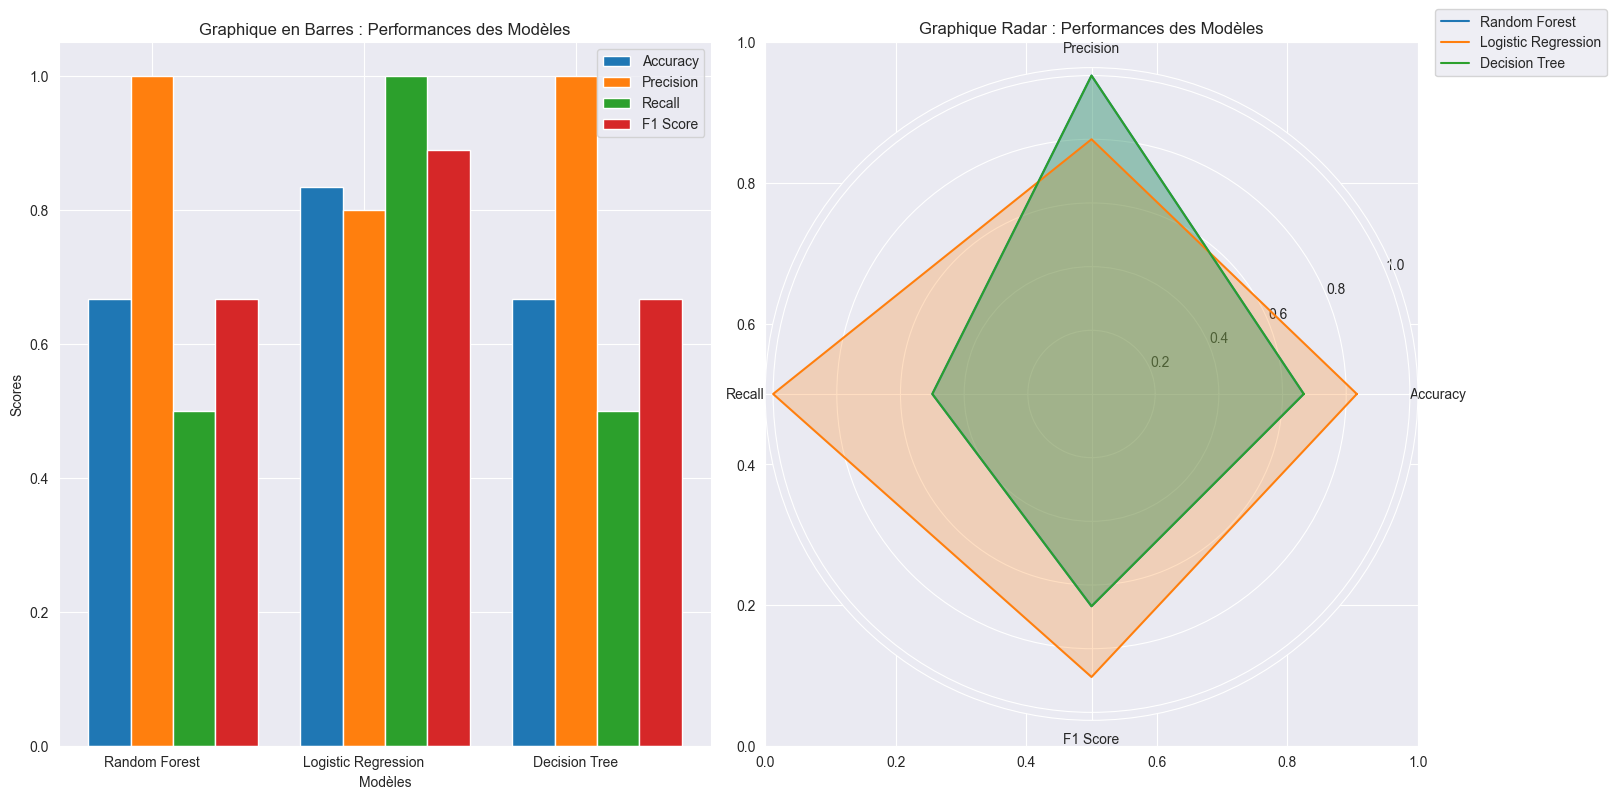

In [278]:
import matplotlib.pyplot as plt

# Données
models = ['Random Forest', 'Logistic Regression', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

accuracy_scores = [accuracy, accuracy_lr, accuracy_dtc]
precision_scores = [precision, precision_lr, precision_dtc]
recall_scores = [recall, recall_lr, recall_dtc]
f1_scores = [f1, f1_lr, f1_dtc]

scores = [
    [accuracy, precision, recall, f1],  # Random Forest
    [accuracy_lr, precision_lr, recall_lr, f1_lr],  # Logistic Regression
    [accuracy_dtc, precision_dtc, recall_dtc, f1_dtc]  # Decision Tree
]

num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fermeture du graphique

# Création de la figure avec deux sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Sous-graphe 1 : Graphique en barres
x = np.arange(len(models))  # Positions des modèles sur l'axe x
width = 0.2  # Largeur des barres

axs[0].bar(x - 0.2, accuracy_scores, width, label='Accuracy')
axs[0].bar(x, precision_scores, width, label='Precision')
axs[0].bar(x + 0.2, recall_scores, width, label='Recall')
axs[0].bar(x + 0.4, f1_scores, width, label='F1 Score')

axs[0].set_xlabel('Modèles')
axs[0].set_ylabel('Scores')
axs[0].set_title('Graphique en Barres : Performances des Modèles')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()

# Sous-graphe 2 : Graphique radar
ax2 = plt.subplot(122, polar=True)
for i, model in enumerate(models):
    values = scores[i] + scores[i][:1]  # Ajouter la première valeur pour boucler
    ax2.plot(angles, values, label=model)
    ax2.fill(angles, values, alpha=0.25)

ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(metrics)
ax2.set_title('Graphique Radar : Performances des Modèles')
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


#### Analyse des résultats :

### Définitions :

Classe positive = SPAM
- Accuracy : Proportion de prédictions correctes par rapport au nombre de prédictions <=> Fiabilité du modèle à classer correctement un exemple
- Precision : Proportion de prédictions positives correctes <=> Fiabilité du modèle à détecter un SPAM
Ensemble des positifs
- Recall : Proportions des instances réellement positives correctement identifiées <=> Capacité du modèle
- 
- F1 Score : Moyenne entre précision et rappel


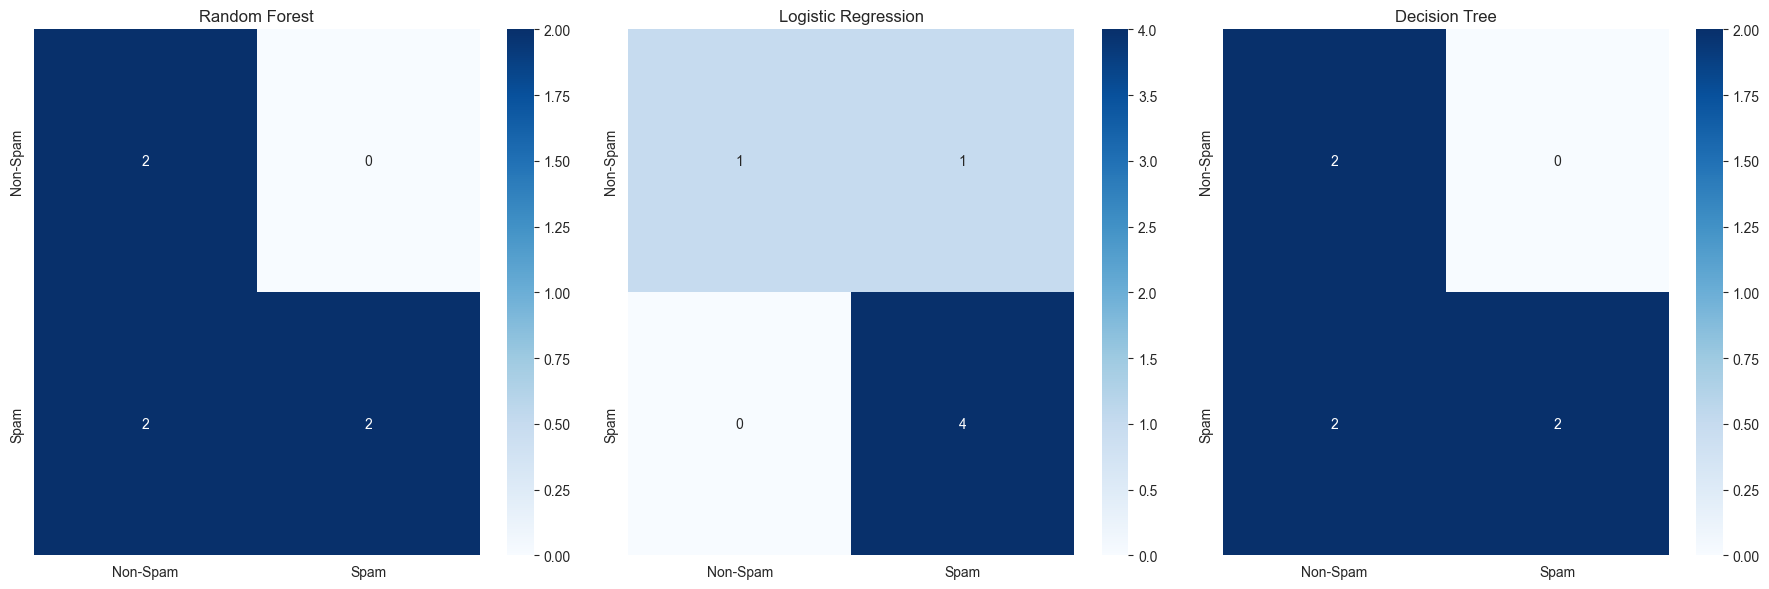

In [279]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion/modèle
cm_rfc = confusion_matrix(y_tests, y_preds)
cm_lr = confusion_matrix(y_tests, y_preds_lr)
cm_dtc = confusion_matrix(y_tests, y_preds_dtc)

# Configuration du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Matrice de confusion pour chaque modèle
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', ax=ax[0], xticklabels=['Non-Spam', 'Spam'],
            yticklabels=['Non-Spam', 'Spam'])
ax[0].set_title('Random Forest')

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax[1], xticklabels=['Non-Spam', 'Spam'],
            yticklabels=['Non-Spam', 'Spam'])
ax[1].set_title('Logistic Regression')

sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', ax=ax[2], xticklabels=['Non-Spam', 'Spam'],
            yticklabels=['Non-Spam', 'Spam'])
ax[2].set_title('Decision Tree')

plt.tight_layout()
plt.show()


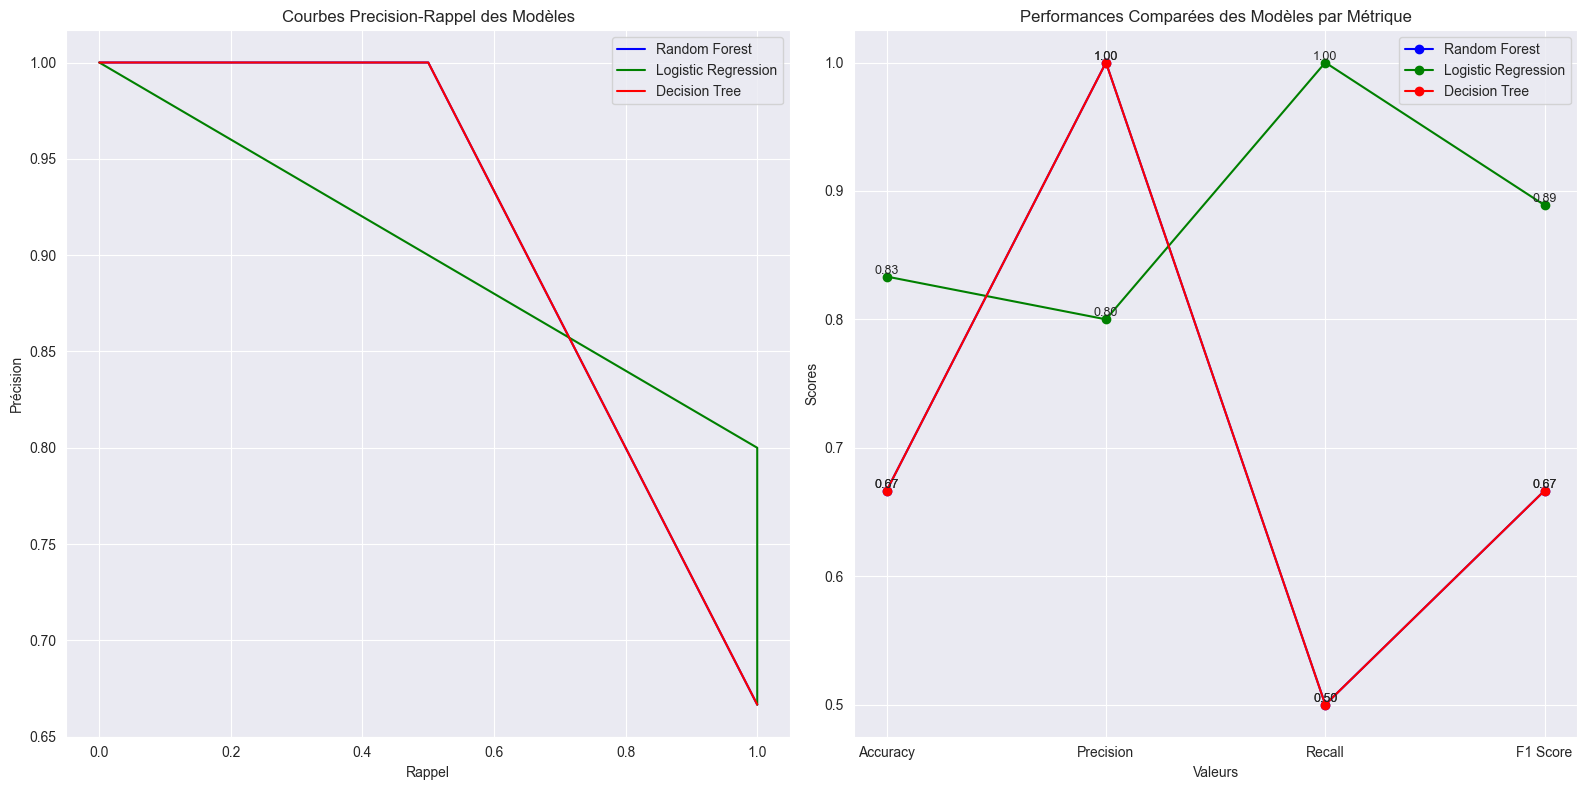

In [280]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Données
models = ['Random Forest', 'Logistic Regression', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

accuracy_scores = [accuracy, accuracy_lr, accuracy_dtc]
precision_scores = [precision, precision_lr, precision_dtc]
recall_scores = [recall, recall_lr, recall_dtc]
f1_scores = [f1, f1_lr, f1_dtc]

scores = [
    [accuracy, precision, recall, f1],  # Random Forest
    [accuracy_lr, precision_lr, recall_lr, f1_lr],  # Logistic Regression
    [accuracy_dtc, precision_dtc, recall_dtc, f1_dtc]  # Decision Tree
]

precision_rfc, recall_rfc, _ = precision_recall_curve(y_tests, y_preds)
precision_lr, recall_lr, _ = precision_recall_curve(y_tests, y_preds_lr)
precision_dtc, recall_dtc, _ = precision_recall_curve(y_tests, y_preds_dtc)

# Création de la figure avec deux sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Sous-graphe 1 : Courbes de précision-rappel
axs[0].plot(recall_rfc, precision_rfc, label='Random Forest', color='blue')
axs[0].plot(recall_lr, precision_lr, label='Logistic Regression', color='green')
axs[0].plot(recall_dtc, precision_dtc, label='Decision Tree', color='red')

axs[0].set_xlabel('Rappel')
axs[0].set_ylabel('Précision')
axs[0].set_title('Courbes Precision-Rappel des Modèles')
axs[0].legend()
axs[0].grid(True)

# Sous-graphe 2 : Graphique en lignes connectées
colors = ['blue', 'green', 'red']
for i, model in enumerate(models):
    axs[1].plot(metrics, scores[i], marker='o', label=model, color=colors[i])
    for j, metric in enumerate(metrics):
        axs[1].text(metric, scores[i][j], f'{scores[i][j]:.2f}', ha='center', va='bottom', fontsize=9)

axs[1].set_title('Performances Comparées des Modèles par Métrique')
axs[1].set_xlabel('Valeurs')
axs[1].set_ylabel('Scores')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Conclusion :